In [1]:
%matplotlib inline

import pprint
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [2]:
features_train = np.load("_train.npy")
assert features_train.shape == (404290, 25), "Something wrong with the train features..."

In [3]:
features_test = np.load("_test.npy")
assert features_test.shape == (2345796, 25), "Something wrong with the test features..."

In [4]:
print("Loading raw datasets...")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print("Loaded.")

Loading raw datasets...
Loaded.


In [5]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [6]:
def test_model(clf_config, train, test, features_train, features_test):
    print(clf_config[1])
    model_count = 0
    val_scores = []
    val_loglosses = []
    scores = []
    loglosses = []
    clf = clf_config[0]
    labels = train["is_duplicate"]
    
    for idx_train, idx_val in skf.split(train["is_duplicate"], train["is_duplicate"]):
        print("MODEL:", model_count)
        labels_train = labels[idx_train]
        f_train = features_train[idx_train]
        labels_val = labels[idx_val]
        f_val = features_train[idx_val]

        clf.fit(f_train, labels_train)
        
        # get validation result
        pred = clf.predict_proba(f_val)
        score = clf.score(f_val, labels_val)
        logloss = log_loss(labels_val, pred)
        print("Valid | accuracy: {} |====| log loss: {}".format(score, logloss))
        val_scores.append(score)
        val_loglosses.append(logloss)
        
        # get train result
        pred = clf.predict_proba(f_train)
        score = clf.score(f_train, labels_train)
        logloss = log_loss(labels_train, pred)
        print("Train | accuracy: {} |====| log loss: {}".format(score, logloss))
        scores.append(score)
        loglosses.append(logloss)

        model_count += 1

        
    final_result = {}
    
    result = {}
    result['scores'] = val_scores
    result['avg_score'] = np.mean(val_scores)
    result['loglosses'] = val_loglosses
    result['avg_logloss'] = np.mean(val_loglosses)
    final_result['valid'] = result
    
    result = {}
    result['scores'] = scores
    result['avg_score'] = np.mean(scores)
    result['loglosses'] = loglosses
    result['avg_logloss'] = np.mean(loglosses)
    final_result['train'] = result
#     print(clf_config[1])
#     pprint.pprint(final_result)
    return final_result

In [7]:
np.random.seed(1213)
summary = {}
models = [
    (LogisticRegression(penalty="l2"), "LR with L2"),
    (LogisticRegression(penalty="l2", C=1e42), "LR without norm"),
    (LogisticRegression(penalty="l1"), "LR with L1"),
    (DecisionTreeClassifier(max_depth=7), "DT with depth of 7"),
    (DecisionTreeClassifier(max_depth=9), "DT with depth of 9"),
    (DecisionTreeClassifier(max_depth=11), "DT with depth of 11"),
    (DecisionTreeClassifier(max_depth=13), "DT with depth of 13"),
    (DecisionTreeClassifier(), "DT without limitation on depth"),
    (RandomForestClassifier(max_depth=7), "RF with depth of 7"),
    (RandomForestClassifier(max_depth=9), "RF with depth of 9"),
    (RandomForestClassifier(max_depth=11), "RF with depth of 11"),
    (RandomForestClassifier(max_depth=13), "RF with depth of 13"),
    (RandomForestClassifier(), "RF without limitation on depth"),
    (GradientBoostingClassifier(max_features="sqrt"), "GB with sqrt"),
    (GradientBoostingClassifier(max_features="log2"), "GB with log2"),
    (AdaBoostClassifier(n_estimators=64, learning_rate=0.9), "AB with lr of 0.9"),
    (AdaBoostClassifier(n_estimators=64, learning_rate=0.8), "AB with lr of 0.8"),
]

In [8]:
for clf_config in models:
    result = test_model(clf_config, train, test, features_train, features_test)
    summary[clf_config[1]] = result

LR with L2
MODEL: 0
Valid | accuracy: 0.8479347019539946 |====| log loss: 0.32336095673259346
Train | accuracy: 0.8485021711647337 |====| log loss: 0.3265614745844035
MODEL: 1
Valid | accuracy: 0.848651991095721 |====| log loss: 0.32861730793328026
Train | accuracy: 0.8484966745451548 |====| log loss: 0.32598327037934405
MODEL: 2
Valid | accuracy: 0.8503339104625278 |====| log loss: 0.3234560660578834
Train | accuracy: 0.8482768097619964 |====| log loss: 0.3265719579431789
MODEL: 3
Valid | accuracy: 0.8514432709193895 |====| log loss: 0.32591569319661223
Train | accuracy: 0.8481782878626728 |====| log loss: 0.326276658734854
MODEL: 4
Valid | accuracy: 0.8487966558658389 |====| log loss: 0.3279463797696226
Train | accuracy: 0.8483706690192134 |====| log loss: 0.32605567604405944
MODEL: 5
Valid | accuracy: 0.8454327339286156 |====| log loss: 0.3296636395611215
Train | accuracy: 0.8488488736083285 |====| log loss: 0.325865671458159
MODEL: 6
Valid | accuracy: 0.8482772267431794 |====| log 

Valid | accuracy: 0.8692060351224339 |====| log loss: 0.3784809358151299
Train | accuracy: 0.8770268784697411 |====| log loss: 0.2735157194332798
MODEL: 3
Valid | accuracy: 0.8711815775804497 |====| log loss: 0.3609158301654613
Train | accuracy: 0.8768733115118136 |====| log loss: 0.27328514378689667
MODEL: 4
Valid | accuracy: 0.8673724306809468 |====| log loss: 0.3749656487504008
Train | accuracy: 0.8772718153360761 |====| log loss: 0.273461593348454
MODEL: 5
Valid | accuracy: 0.8665067154765144 |====| log loss: 0.38262757222157934
Train | accuracy: 0.8772415840114769 |====| log loss: 0.2729714035409177
MODEL: 6
Valid | accuracy: 0.8678671250834796 |====| log loss: 0.36580616208181826
Train | accuracy: 0.8770492028549364 |====| log loss: 0.2741295014706819
MODEL: 7
Valid | accuracy: 0.8708568318986841 |====| log loss: 0.387371945334592
Train | accuracy: 0.8775442338029252 |====| log loss: 0.27352292125096167
MODEL: 8
Valid | accuracy: 0.8689522113386762 |====| log loss: 0.358295588401

Valid | accuracy: 0.8728635385490613 |====| log loss: 0.2781337184694306
Train | accuracy: 0.8768815564185225 |====| log loss: 0.27106185681255
MODEL: 5
Valid | accuracy: 0.8718741497439957 |====| log loss: 0.28435163954565273
Train | accuracy: 0.8782941837679773 |====| log loss: 0.27052209625421075
MODEL: 6
Valid | accuracy: 0.8711073734200697 |====| log loss: 0.2824637624438446
Train | accuracy: 0.876821093769324 |====| log loss: 0.27194081973098394
MODEL: 7
Valid | accuracy: 0.8728356584545365 |====| log loss: 0.2797209668976177
Train | accuracy: 0.8771787106100665 |====| log loss: 0.27072128624007435
MODEL: 8
Valid | accuracy: 0.8718709805085584 |====| log loss: 0.28192755251985974
Train | accuracy: 0.8765383579488927 |====| log loss: 0.27086635691271155
MODEL: 9
Valid | accuracy: 0.8722667458197289 |====| log loss: 0.28093455023960556
Train | accuracy: 0.8768516635427717 |====| log loss: 0.27109180222112234
RF with depth of 13
MODEL: 0
Valid | accuracy: 0.8750185505812516 |====| l

Train | accuracy: 0.8617054314697096 |====| log loss: 0.6633208074144794
MODEL: 7
Valid | accuracy: 0.8607153457999407 |====| log loss: 0.6641166802904324
Train | accuracy: 0.8616041246406605 |====| log loss: 0.6639713910260532
MODEL: 8
Valid | accuracy: 0.8622984070446226 |====| log loss: 0.6638297795766552
Train | accuracy: 0.8614089957181569 |====| log loss: 0.6638417651897717
MODEL: 9
Valid | accuracy: 0.8639556742851489 |====| log loss: 0.6633783765901388
Train | accuracy: 0.8614804513799188 |====| log loss: 0.6636146423094826
AB with lr of 0.8
MODEL: 0
Valid | accuracy: 0.8605243630967103 |====| log loss: 0.6610033891782858
Train | accuracy: 0.8604490738196009 |====| log loss: 0.6610254400413945
MODEL: 1
Valid | accuracy: 0.8610190452634182 |====| log loss: 0.6612346515759433
Train | accuracy: 0.8612983015445501 |====| log loss: 0.6612231402369628
MODEL: 2
Valid | accuracy: 0.860375958446698 |====| log loss: 0.6611543954774778
Train | accuracy: 0.861584125762656 |====| log loss: 

In [9]:
summary

{'AB with lr of 0.8': {'train': {'avg_logloss': 0.66099549706995275,
   'avg_score': 0.86094964827932352,
   'loglosses': [0.66102544004139452,
    0.66122314023696283,
    0.66114545396523972,
    0.66083359781816775,
    0.66068022102694079,
    0.6608901780048384,
    0.66107869998245972,
    0.6609668028441168,
    0.66101186873918694,
    0.66109956804021941],
   'scores': [0.8604490738196009,
    0.86129830154455012,
    0.86158412576265597,
    0.86088368910105784,
    0.86123822008953965,
    0.85978986481101305,
    0.86064733510873659,
    0.86139250595005801,
    0.86113691454452512,
    0.86107645206149586]},
  'valid': {'avg_logloss': 0.66100566217562595,
   'avg_score': 0.86093892955775631,
   'loglosses': [0.66100338917828583,
    0.6612346515759433,
    0.66115439547747779,
    0.66064216052690894,
    0.66084100697311632,
    0.66070619017191934,
    0.66096994668907438,
    0.66131142485761518,
    0.6612184637576124,
    0.6609749925483055],
   'scores': [0.860524363

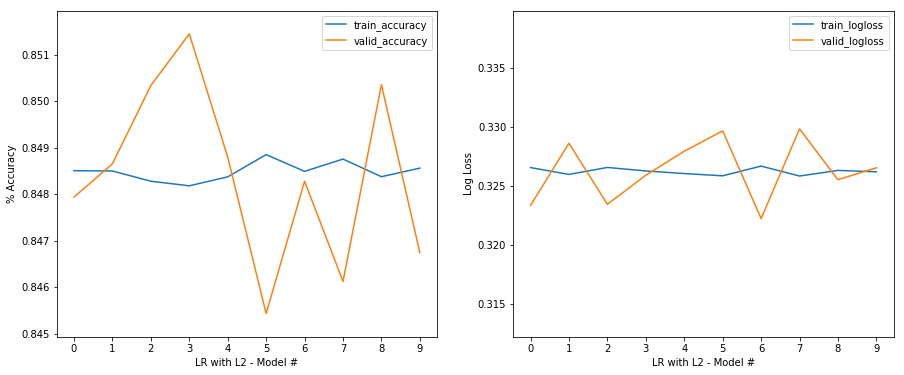

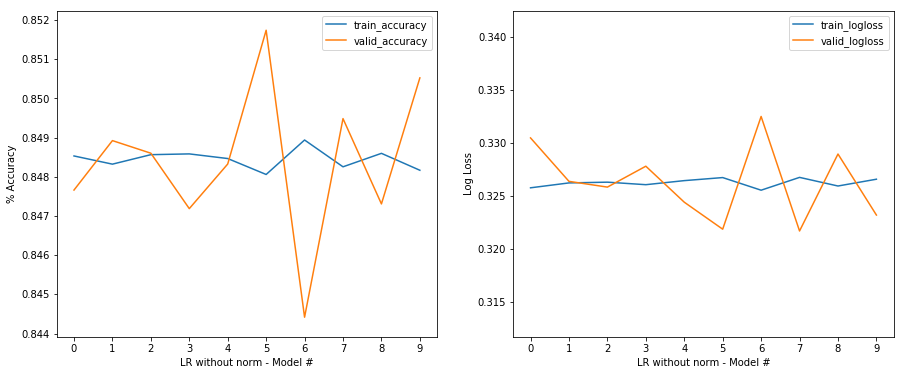

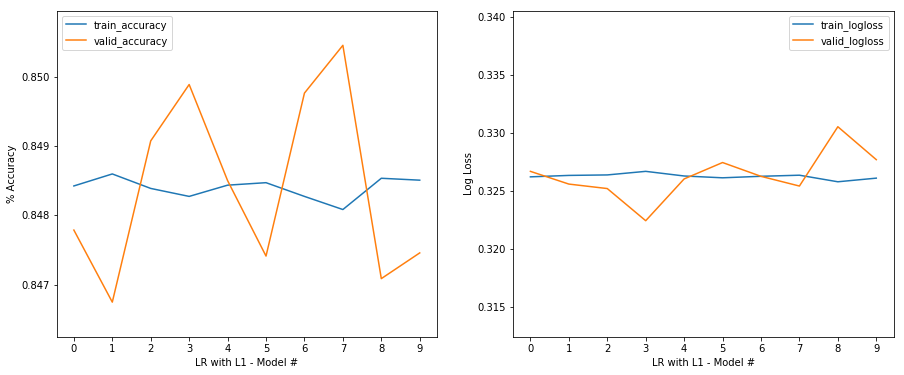

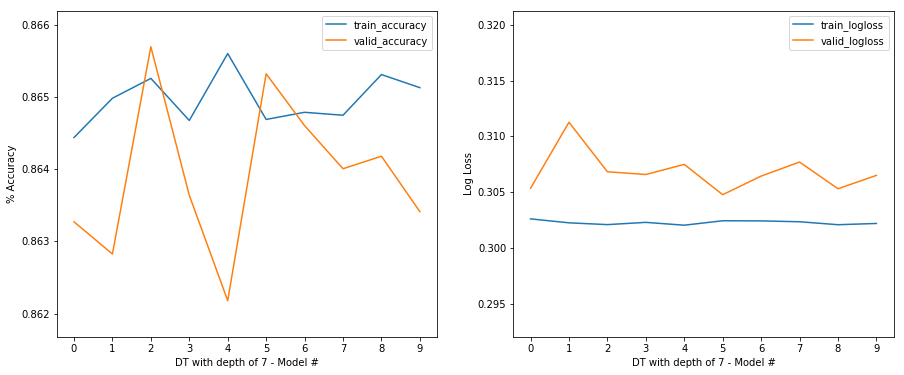

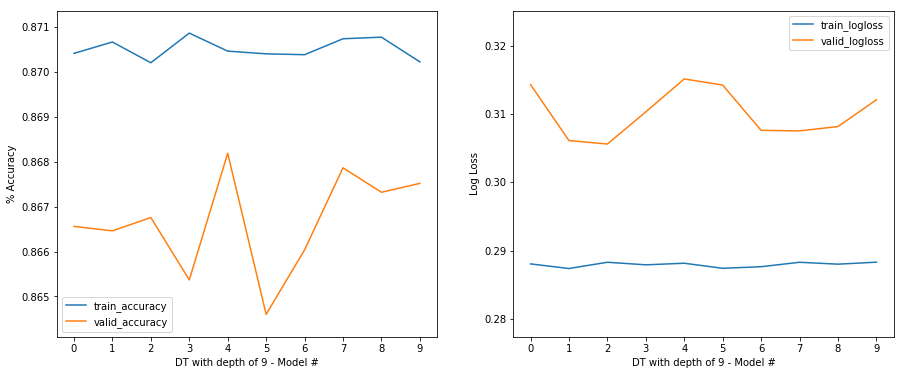

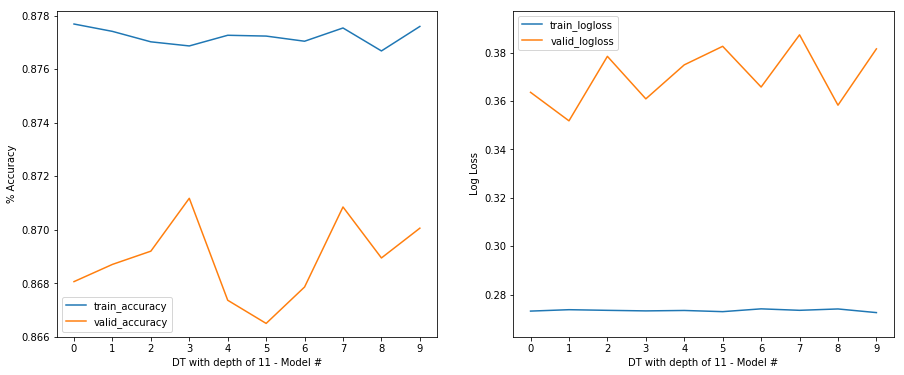

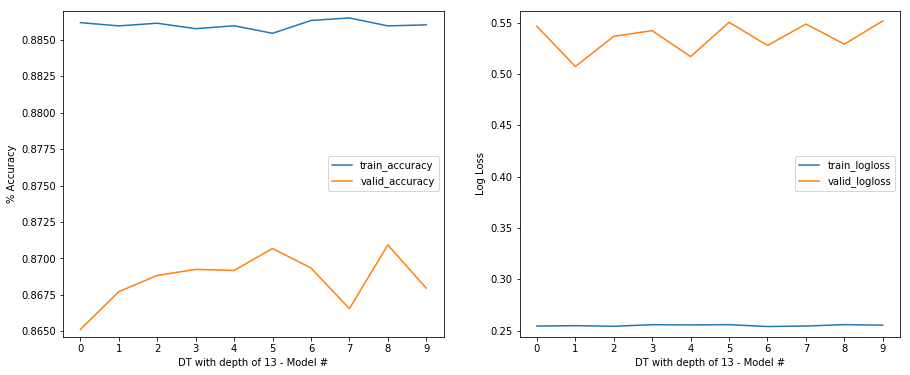

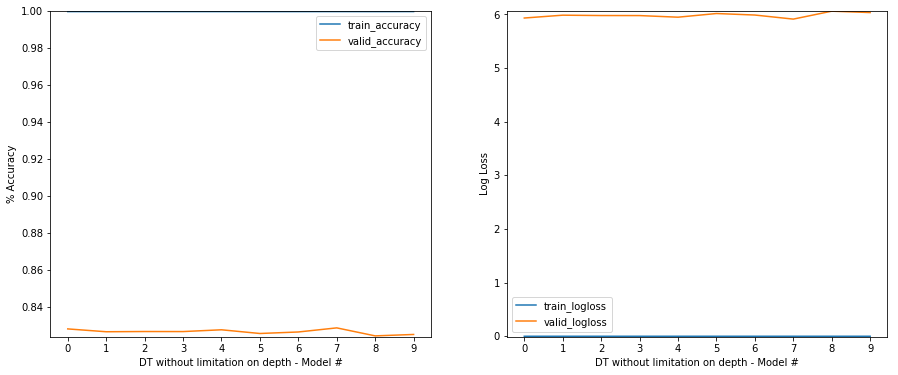

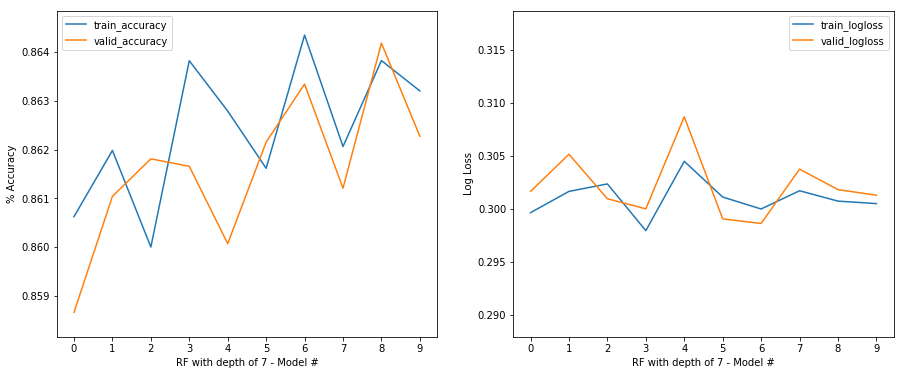

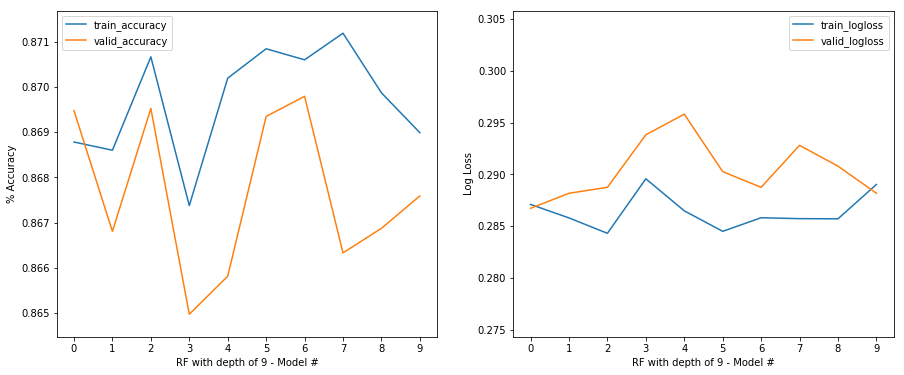

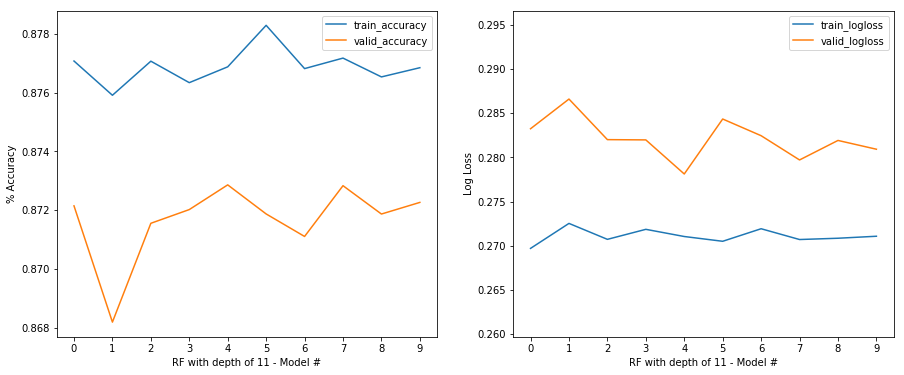

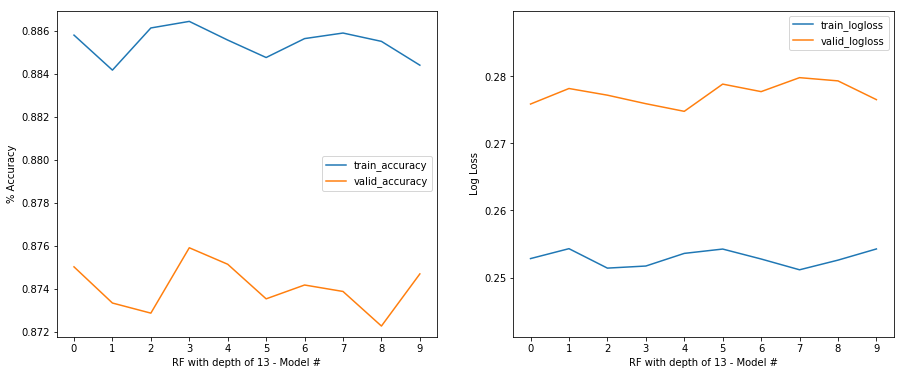

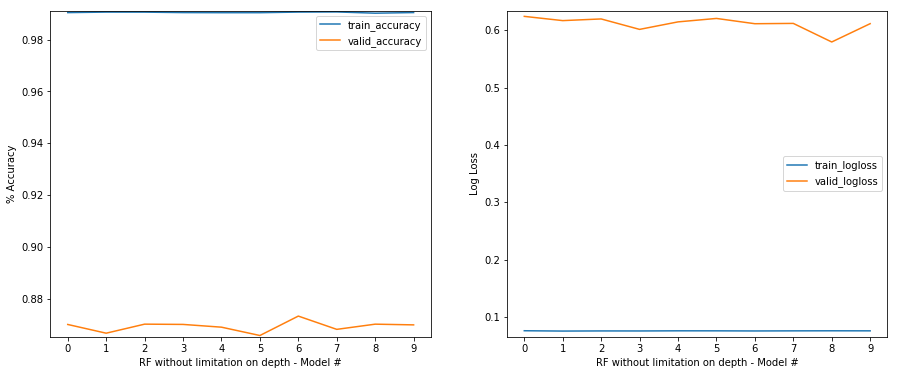

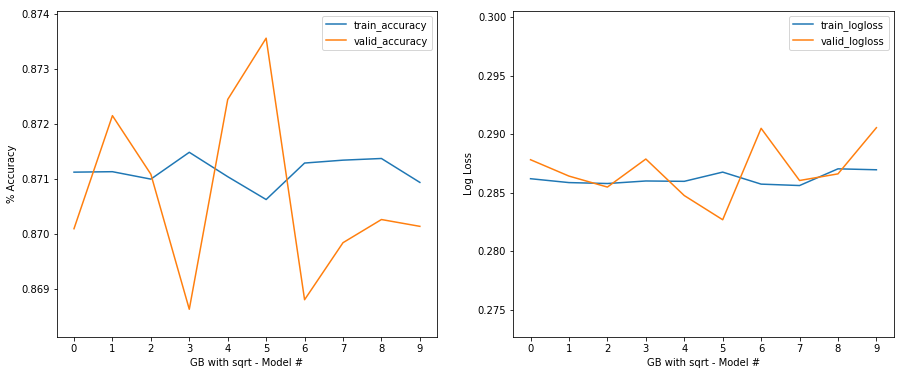

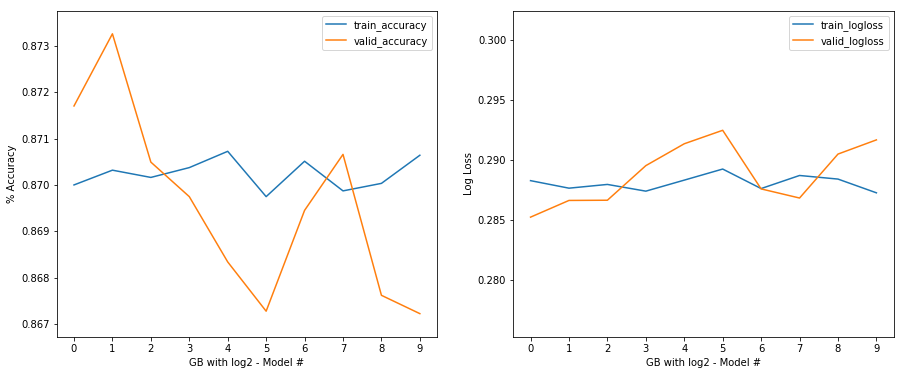

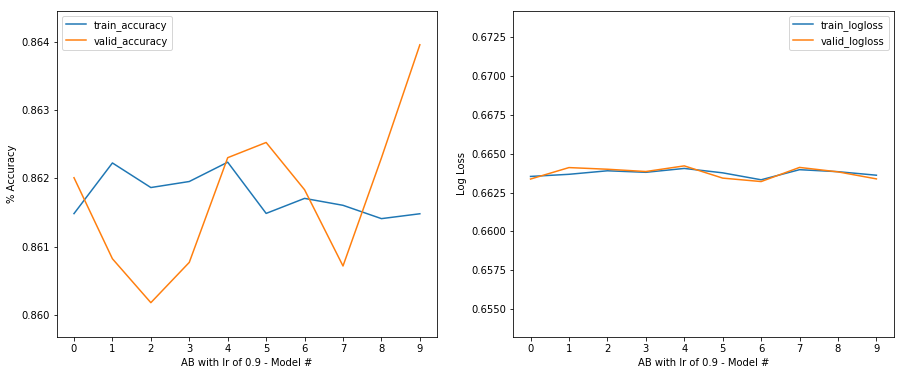

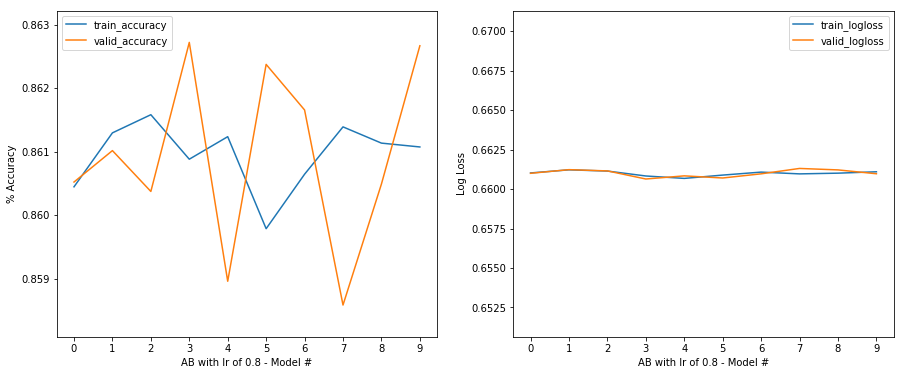

In [10]:
i = 0
for key, value in summary.items():
    try:
        fig = plt.figure(i)
        i += 1
        plt.figure(figsize=(15,6))
        ax = plt.subplot(1,2,1) 
        ylim_elements = np.array([value['train']['scores'], value['valid']['scores']])
        plt.ylim(ylim_elements.min() - 5e-4, ylim_elements.max() + 5e-4)
        plt.xticks([i for i in range(len(value['train']['scores']))])
        ax.set_xlabel("{} - Model #".format(key))
        ax.set_ylabel("% Accuracy")
        plt.plot(value['train']['scores'], label="train_accuracy")
        plt.plot(value['valid']['scores'], label="valid_accuracy")
        ax.legend()
        ax = plt.subplot(1,2,2)
        ylim_elements = np.array([value['train']['loglosses'], value['valid']['loglosses']])
        plt.ylim(ylim_elements.min() - 1e-2, ylim_elements.max() + 1e-2)
        plt.xticks([i for i in range(len(value['train']['loglosses']))])
        ax.set_xlabel("{} - Model #".format(key))
        ax.set_ylabel("Log Loss")
        plt.plot(value['train']['loglosses'], label="train_logloss")
        plt.plot(value['valid']['loglosses'], label="valid_logloss")
        ax.legend()
        plt.savefig('./plots/{}.png'.format(key))
        plt.show()
    except:
        print(key, "Error")
        pass

In [11]:
for key, value in summary.items():
    print()
    print(key)
    print('Train')
    print('avg_score', value['train']['avg_score'])
    print('avg_logloss', value['train']['avg_logloss'])
    print('Valid')
    print('avg_score', value['valid']['avg_score'])
    print('avg_logloss', value['valid']['avg_logloss'])


LR with L2
Train
avg_score 0.84848472345
avg_logloss 0.326237718297
Valid
avg_score 0.848408311588
avg_logloss 0.326312293669

LR without norm
Train
avg_score 0.848449545403
avg_logloss 0.326236988301
Valid
avg_score 0.848418219915
avg_logloss 0.326313864918

LR with L1
Train
avg_score 0.848397327629
avg_logloss 0.326231275381
Valid
avg_score 0.848415744607
avg_logloss 0.32630727039

DT with depth of 7
Train
avg_score 0.864960245669
avg_logloss 0.302284407379
Valid
avg_score 0.863912042857
avg_logloss 0.306829621938

DT with depth of 9
Train
avg_score 0.870511816201
avg_logloss 0.287948945924
Valid
avg_score 0.866667498389
avg_logloss 0.310118237359

DT with depth of 11
Train
avg_score 0.877240484774
avg_logloss 0.273453048338
Valid
avg_score 0.868878784755
avg_logloss 0.370548812541

DT with depth of 13
Train
avg_score 0.886035326619
avg_logloss 0.255004840935
Valid
avg_score 0.868559706559
avg_logloss 0.535631710454

DT without limitation on depth
Train
avg_score 0.999865882845
avg_

In [12]:
import json
with open('experiments.json', 'w') as fp:
    json.dump(summary, fp)